In [295]:
import pandas as pd
from sklearn.cluster import KMeans
import random
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

df = pd.read_csv('/Users/nooshy/Downloads/archive (7)/nodes.csv')

df.head()

,spotify_id,name,followers,popularity,genres,chart_hits
0,48WvrUGoijadXXCsGocwM4,Byklubben,1738.0,24.0,"['nordic house', 'russelater']",['no (3)']
1,4lDiJcOJ2GLCK6p9q5BgfK,Kontra K,1999676.0,72.0,"['christlicher rap', 'german hip hop']","['at (44)', 'de (111)', 'lu (22)', 'ch (31)', ..."
2,652XIvIBNGg3C0KIGEJWit,Maxim,34596.0,36.0,[],['de (1)']
3,3dXC1YPbnQPsfHPVkm1ipj,Christopher Martin,249233.0,52.0,"['dancehall', 'lovers rock', 'modern reggae', ...","['at (1)', 'de (1)']"
4,74terC9ol9zMo8rfzhSOiG,Jakob Hellman,21193.0,39.0,"['classic swedish pop', 'norrbotten indie', 's...",['se (6)']


In [296]:
#Cleaning:
#Remove whitespace
df.columns = df.columns.str.strip()

#Drop any nas
df = df.dropna(subset = ['spotify_id', 'genres'])

In [297]:
#Clustering based on genres

from sklearn.preprocessing import MultiLabelBinarizer

# Parse the 'genres' column into list format
df['genres_parsed'] = df['genres'].apply(lambda x: eval(x) if pd.notnull(x) else [])

# Apply one-hot encoding using MultiLabelBinarizer
mlb = MultiLabelBinarizer()
genres_encoded = pd.DataFrame(mlb.fit_transform(df['genres_parsed']), columns=mlb.classes_, index=df.index)

# Combine the encoded genres with the original DataFrame
df_encoded = pd.concat([df, genres_encoded], axis=1)

# Drop unnecessary columns for clustering
df_for_clustering = df_encoded.drop(columns=['name', 'genres', 'followers', 'popularity', 'chart_hits', 'genres_parsed'])

# Display a preview of the transformed dataset
df_for_clustering.head()
df.head()

,spotify_id,name,followers,popularity,genres,chart_hits,genres_parsed
0,48WvrUGoijadXXCsGocwM4,Byklubben,1738.0,24.0,"['nordic house', 'russelater']",['no (3)'],"[nordic house, russelater]"
1,4lDiJcOJ2GLCK6p9q5BgfK,Kontra K,1999676.0,72.0,"['christlicher rap', 'german hip hop']","['at (44)', 'de (111)', 'lu (22)', 'ch (31)', ...","[christlicher rap, german hip hop]"
2,652XIvIBNGg3C0KIGEJWit,Maxim,34596.0,36.0,[],['de (1)'],[]
3,3dXC1YPbnQPsfHPVkm1ipj,Christopher Martin,249233.0,52.0,"['dancehall', 'lovers rock', 'modern reggae', ...","['at (1)', 'de (1)']","[dancehall, lovers rock, modern reggae, reggae..."
4,74terC9ol9zMo8rfzhSOiG,Jakob Hellman,21193.0,39.0,"['classic swedish pop', 'norrbotten indie', 's...",['se (6)'],"[classic swedish pop, norrbotten indie, swedis..."


In [298]:
# Count the occurrences of each genre (sum of binary columns)
genre_counts = genres_encoded.sum().sort_values(ascending=False)

# Select the top 20 most common genres
top_genres = genre_counts.head(20).index

df_top_genres = pd.concat([df[['spotify_id']], genres_encoded[top_genres]], axis=1)
df_top_genres = df_top_genres.set_index('spotify_id')
df_top_genres.head()
df = df.set_index('spotify_id')

In [301]:
inertia_values = []
for k in range(1,51):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df_top_genres)
    inertia_values.append(kmeans.inertia_)

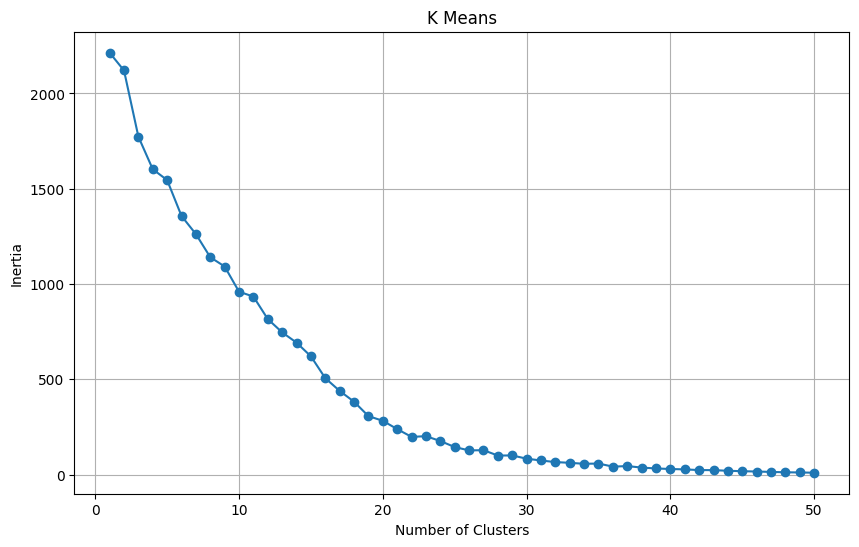

In [302]:
plt.figure(figsize = (10, 6))
plt.plot(range(1,51), inertia_values, marker = 'o')
plt.title('K Means')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [288]:
kmeans = KMeans(n_clusters = 20)
cluster_labels = kmeans.fit_predict(df_top_genres)
df_top_genres['cluster'] = cluster_labels
print(df_top_genres.head())

                        pop  dance pop  mandopop  german hip hop  \
spotify_id                                                         
48WvrUGoijadXXCsGocwM4    0          0         0               0   
4lDiJcOJ2GLCK6p9q5BgfK    0          0         0               1   
652XIvIBNGg3C0KIGEJWit    0          0         0               0   
3dXC1YPbnQPsfHPVkm1ipj    0          0         0               0   
74terC9ol9zMo8rfzhSOiG    0          0         0               0   

                        tropical house  uk pop  taiwan pop  pop dance  rap  \
spotify_id                                                                   
48WvrUGoijadXXCsGocwM4               0       0           0          0    0   
4lDiJcOJ2GLCK6p9q5BgfK               0       0           0          0    0   
652XIvIBNGg3C0KIGEJWit               0       0           0          0    0   
3dXC1YPbnQPsfHPVkm1ipj               0       0           0          0    0   
74terC9ol9zMo8rfzhSOiG               0       0         

In [289]:
grouped = df_top_genres.groupby('cluster')

In [292]:
for cluster, group in grouped:
    print(f"\nCluster {cluster}:")
    sample_artists = group.sample(n = 5).index
    for artist in sample_artists:
        print(f"Artist ID: {artist} Artist name:{df.loc[artist, "name"]} Genres: {df.loc[artist, "genres"]}")


Cluster 0:
Artist ID: 2ZCo2h44Aw96u9I8OEX9Wp Artist name:Pétur Örn Guðmundsson Genres: []
Artist ID: 6cFxy6HNZdNfvTiSkgHEPf Artist name:Jiří Schelinger Genres: ['classic czech pop', 'czech folk', 'czech rock', 'czech singer-songwriter']
Artist ID: 4jCIAMb0zEArF3GYEYzoDk Artist name:Joy Again Genres: ['indie garage rock', 'indie pop']
Artist ID: 3AwNBhYb8tZmJ5m0VIKHp2 Artist name:Перемотка Genres: ['russian post-punk']
Artist ID: 61O1t9W4rYDRcGF9DJUTJw Artist name:Zokush Genres: ['rap francais']

Cluster 1:
Artist ID: 0bOlhT8OcoC1lCpN69NcFP Artist name:Kat Deluna Genres: ['dance pop', 'post-teen pop']
Artist ID: 1XgFuvRd7r5g0h844A5ZUQ Artist name:Take That Genres: ['boy band', 'dance pop', 'europop', 'uk pop']
Artist ID: 17UkABEasVRlCcIFZ3wHb7 Artist name:Steps Genres: ['bubblegum dance', 'dance pop', 'diva house', 'europop', 'new wave pop', 'uk pop']
Artist ID: 7sfl4Xt5KmfyDs2T3SVSMK Artist name:Lil Jon Genres: ['atl hip hop', 'crunk', 'dance pop', 'dirty south rap', 'old school atlan

In [193]:
#Clustering based on popularity

pop_df = pd.DataFrame(df, columns = ['followers', 'popularity'])
genres_df = pd.DataFrame(df, columns = ['genres'])

genres_df[:10]
pop_df[:10]

,followers,popularity
0,1738.0,24.0
1,1999676.0,72.0
2,34596.0,36.0
3,249233.0,52.0
4,21193.0,39.0
5,26677.0,19.0
6,11312.0,37.0
7,36252.0,31.0
8,14619.0,43.0
9,188.0,12.0


In [194]:
inertia_values = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(pop_df)
    inertia_values.append(kmeans.inertia_)

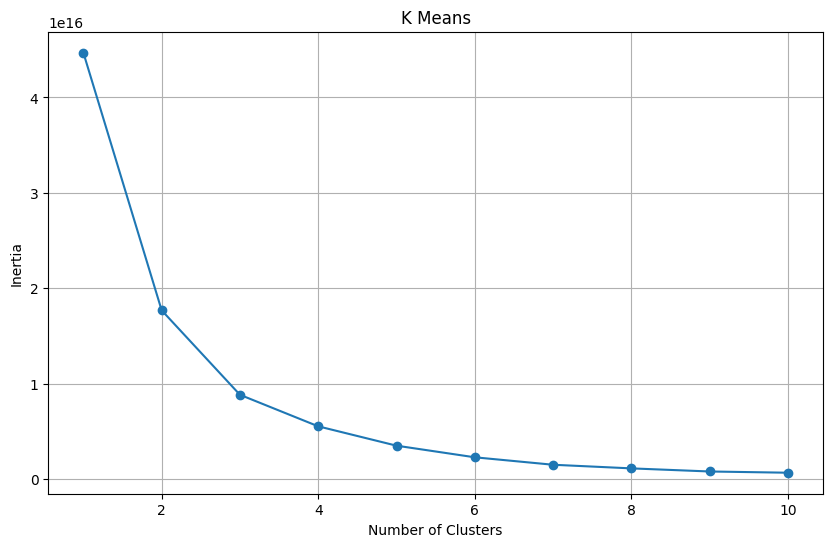

In [195]:
plt.figure(figsize = (10, 6))
plt.plot(range(1,11), inertia_values, marker = 'o')
plt.title('K Means')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [55]:
kmeans = KMeans(n_clusters = 3)
cluster_labels = kmeans.fit_predict(pop_df)
pop_df['cluster'] = cluster_labels
print(pop_df[:20])

    followers  popularity  cluster
0      1738.0        24.0        0
1   1999676.0        72.0        0
2     34596.0        36.0        0
3    249233.0        52.0        0
4     21193.0        39.0        0
5     26677.0        19.0        0
6     11312.0        37.0        0
7     36252.0        31.0        0
8     14619.0        43.0        0
9       188.0        12.0        0
10     7246.0        30.0        0
11      798.0         9.0        0
12   327256.0        63.0        0
13    11174.0        21.0        0
14     6408.0        29.0        0
15    40344.0        58.0        0
16       17.0         0.0        0
17     3207.0        27.0        0
18      517.0         0.0        0
19     6752.0        29.0        0


In [56]:
grouped = pop_df.groupby('cluster')

print(grouped.get_group(0)[:5])
print(grouped.get_group(1)[:5])
print(grouped.get_group(2)[:5])

   followers  popularity  cluster
0     1738.0        24.0        0
1  1999676.0        72.0        0
2    34596.0        36.0        0
3   249233.0        52.0        0
4    21193.0        39.0        0
      followers  popularity  cluster
23   36163788.0        88.0        1
242  20361435.0        80.0        1
280  27956268.0        82.0        1
466  32087569.0        88.0        1
606  26039960.0        87.0        1
     followers  popularity  cluster
31   4122782.0        74.0        2
137  8134874.0        80.0        2
182  6287949.0        68.0        2
228  4802003.0        70.0        2
230  4195623.0        77.0        2


In [57]:
for cluster, group in grouped:
    print(f"\nCluster {cluster}:")
    person_samp = group.sample(n = 3).index
    for person in person_samp:
        print(f"ID:{person}\tFollowers:  {df.loc[person, "followers"]} \t Popularity: {df.loc[person, "popularity"]}")


Cluster 0:
ID:1465	Followers:  604433.0 	 Popularity: 42.0
ID:6175	Followers:  2071.0 	 Popularity: 7.0
ID:973	Followers:  2510.0 	 Popularity: 19.0

Cluster 1:
ID:4681	Followers:  20528951.0 	 Popularity: 85.0
ID:6423	Followers:  28400048.0 	 Popularity: 87.0
ID:7527	Followers:  38371125.0 	 Popularity: 88.0

Cluster 2:
ID:2070	Followers:  12128335.0 	 Popularity: 77.0
ID:1211	Followers:  9404731.0 	 Popularity: 70.0
ID:2353	Followers:  5707604.0 	 Popularity: 71.0


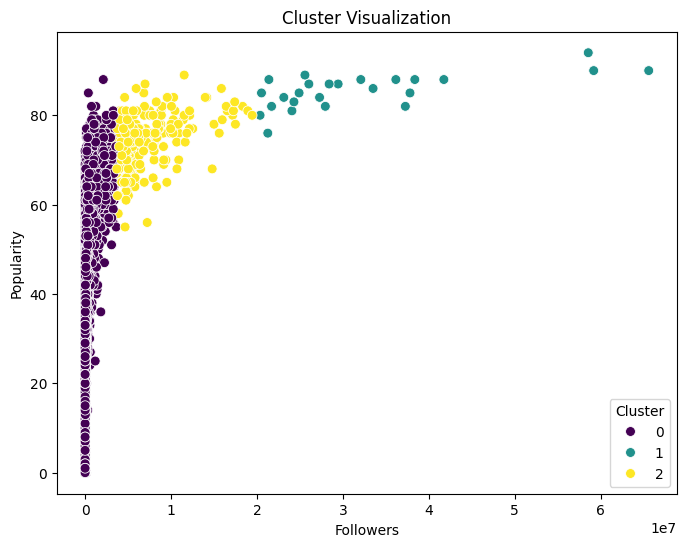

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='followers', 
    y='popularity', 
    hue='cluster', 
    data=pop_df,
    palette='viridis', 
    s=50
)
plt.title('Cluster Visualization')
plt.xlabel('Followers')
plt.ylabel('Popularity')
plt.legend(title='Cluster')
plt.show()